# 1. Import required libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 2.Load Dataset

In [24]:
df = pd.read_csv("heart_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0,125,212,0,yes,168,0,1.0,2,2,3,0
1,53.0,1.0,0,140,203,1,no,155,1,3.1,0,0,3,0
2,70.0,1.0,0,145,174,0,yes,125,1,2.6,0,0,3,0
3,61.0,1.0,0,148,203,0,yes,161,0,0.0,2,1,3,0
4,62.0,0.0,0,138,294,1,yes,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1,140,221,0,yes,164,1,0.0,2,0,2,1
1021,NaN,1.0,0,125,258,0,no,141,1,2.8,1,1,3,0
1022,47.0,1.0,0,110,275,0,no,118,1,1.0,1,1,2,0
1023,50.0,0.0,0,110,254,0,no,159,0,0.0,2,0,2,1


In [25]:
# Check dataset size
"Dataset shape (Size):", df.shape

('Dataset shape (Size):', (1025, 14))

In [26]:
# Check column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       943 non-null    float64
 1   sex       974 non-null    float64
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1010 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 112.2+ KB


In [27]:
# Identify target variable
X = df.drop(columns='target', axis=1)
Y = df['target']
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# 3. Data Cleaning and Preparation

## 3.1 Feature Encoding

In [28]:
#Encoding Data
df['restecg'] = df['restecg'].map({'yes':1 , 'no':0 })

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       943 non-null    float64
 1   sex       974 non-null    float64
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1010 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 112.2 KB


## 3.2 Handling Missing Values

In [30]:
df[['age', 'sex',"restecg"]].isna().sum()

age        82
sex        51
restecg    15
dtype: int64

In [31]:
df['age'].fillna(df['age'].median(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

C:\Users\samam\AppData\Local\Temp\ipykernel_26204\574444811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\samam\AppData\Local\Temp\ipykernel_26204\574444811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [32]:
df[['age', 'sex',"restecg"]].isna().sum()

age        0
sex        0
restecg    0
dtype: int64

## 3.3 Visualizations and Outlier Detection

#####        For Numerical Columns

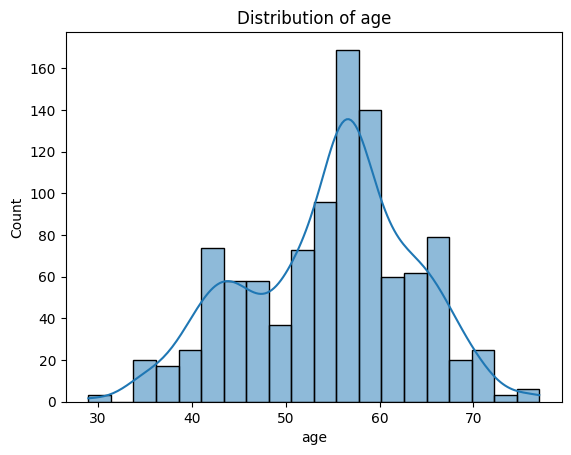

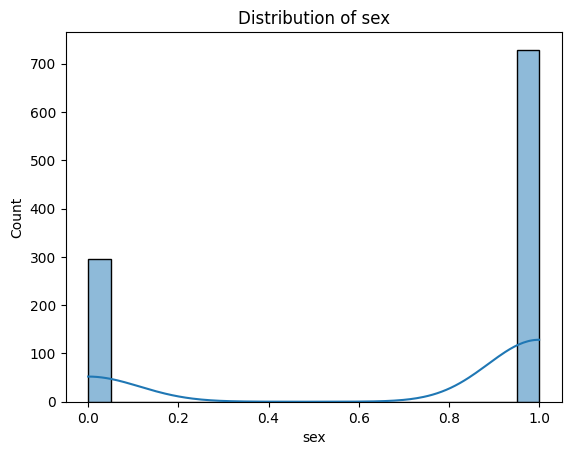

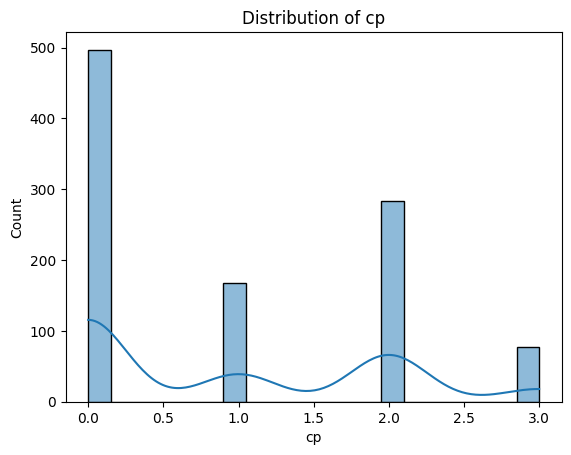

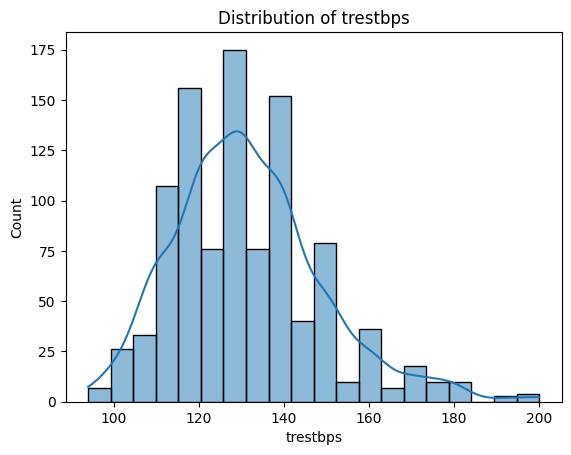

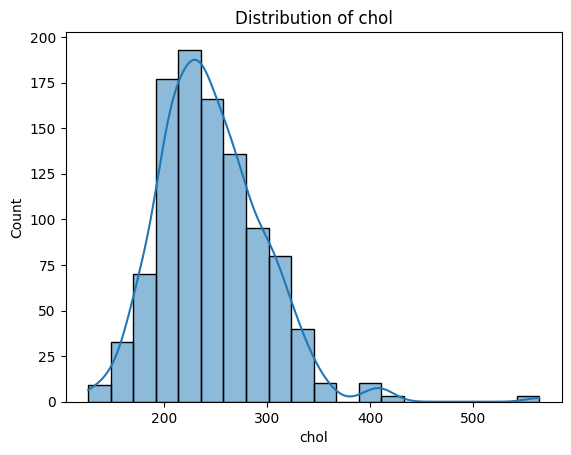

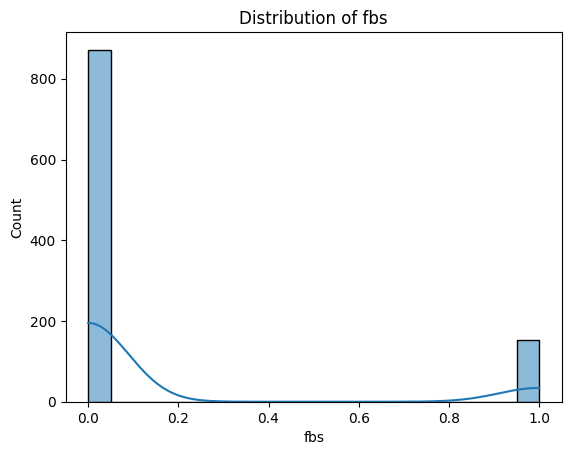

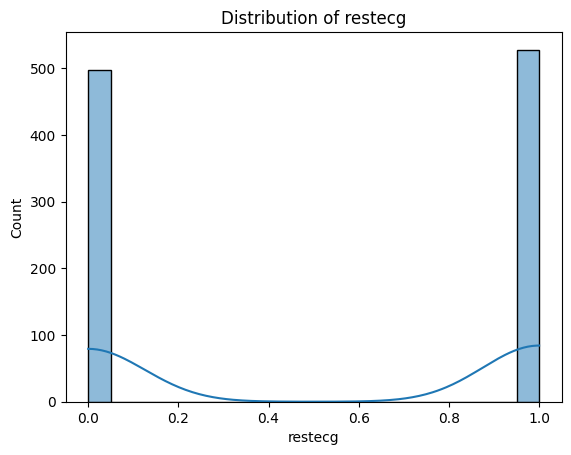

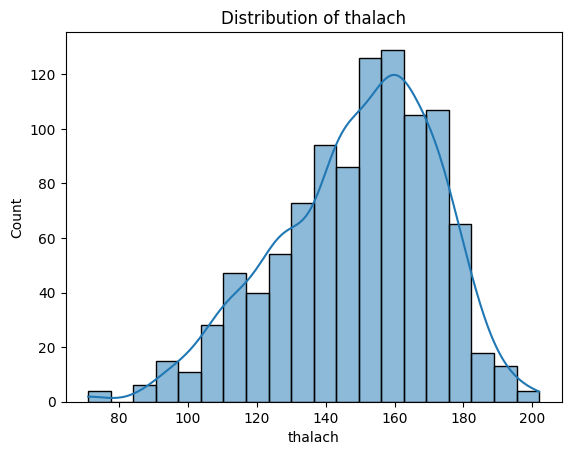

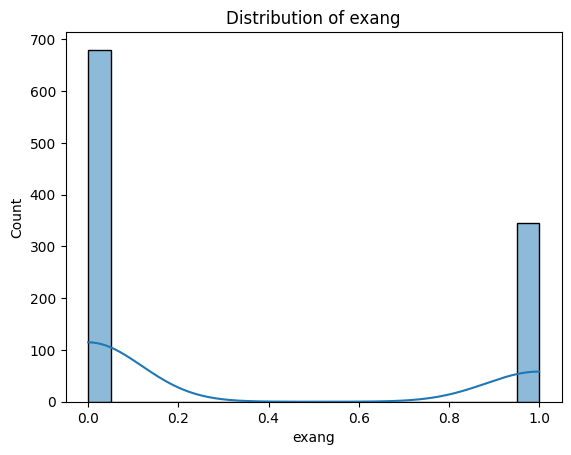

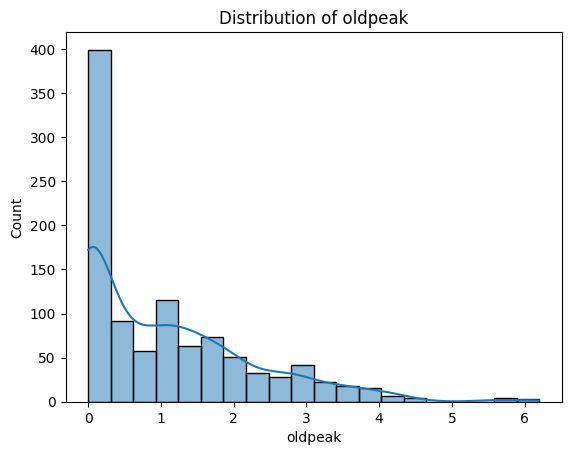

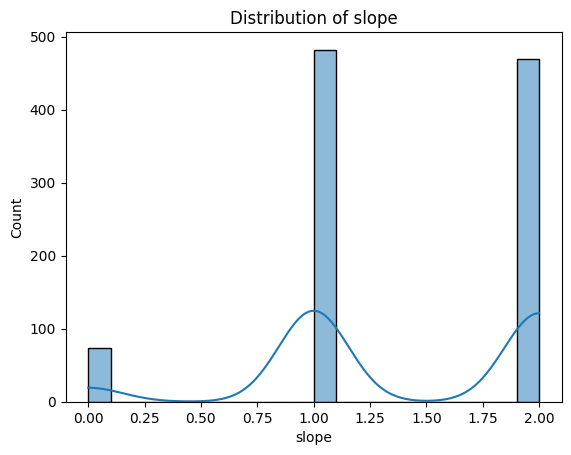

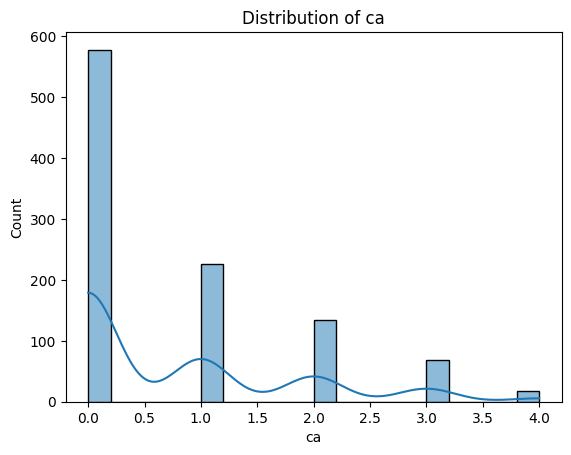

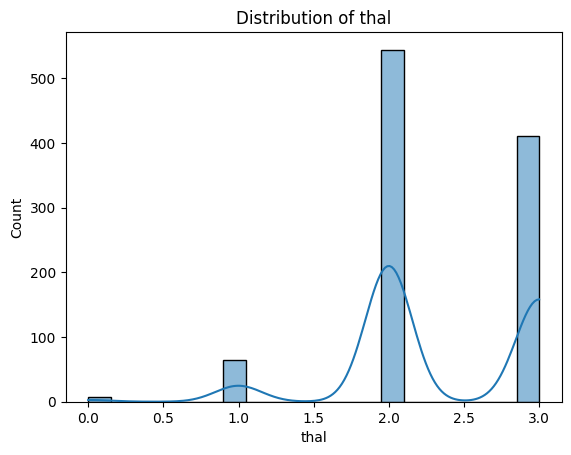

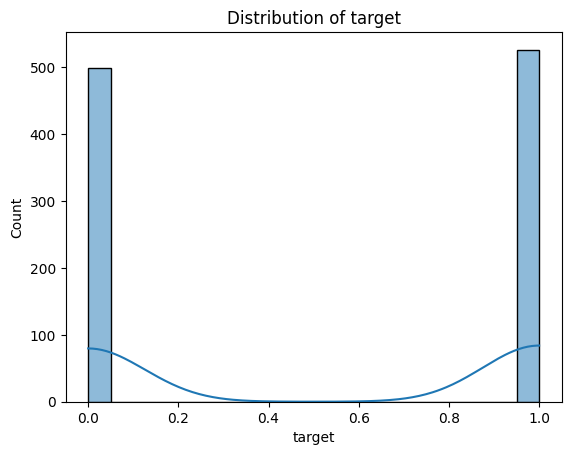

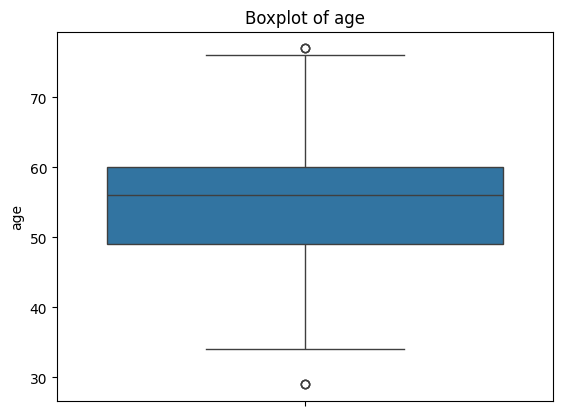

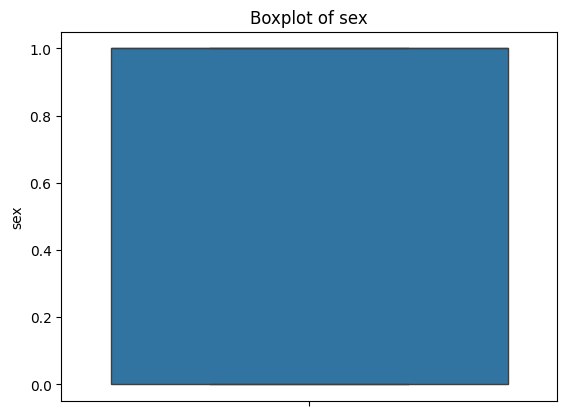

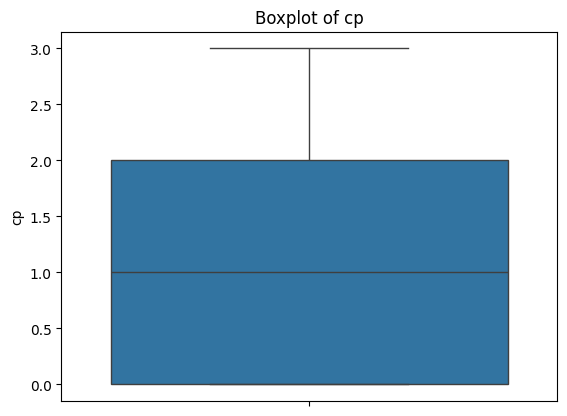

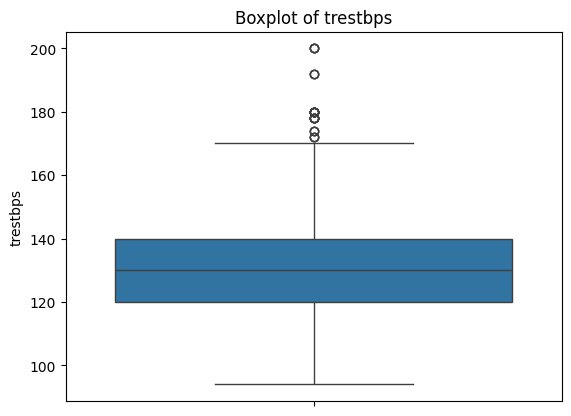

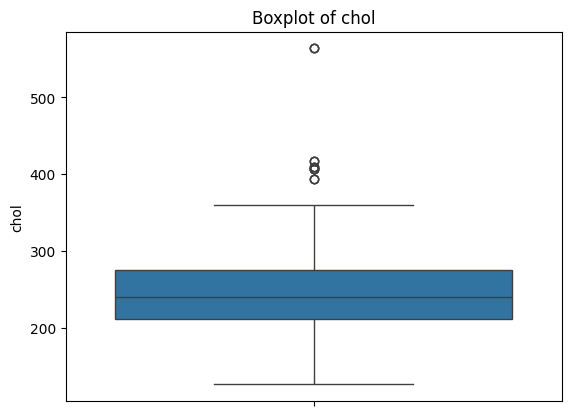

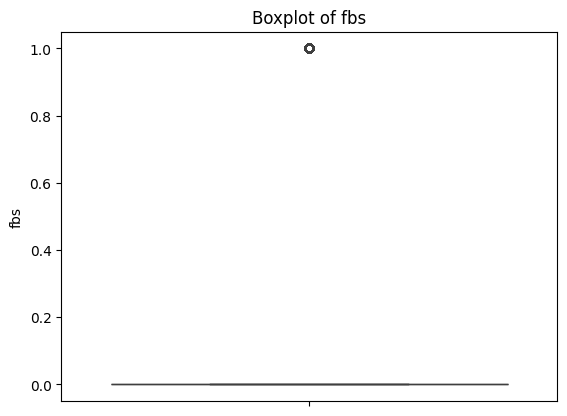

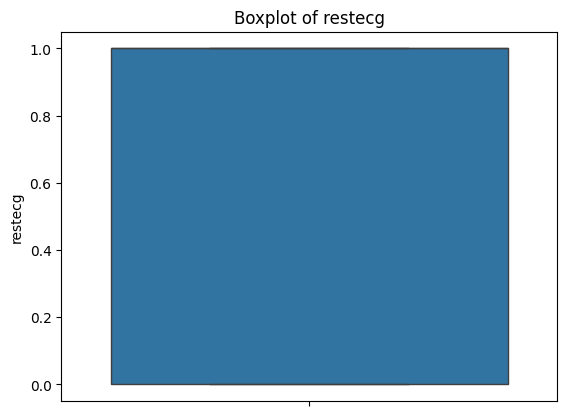

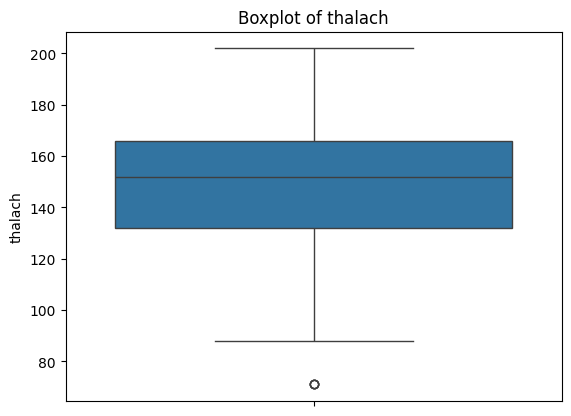

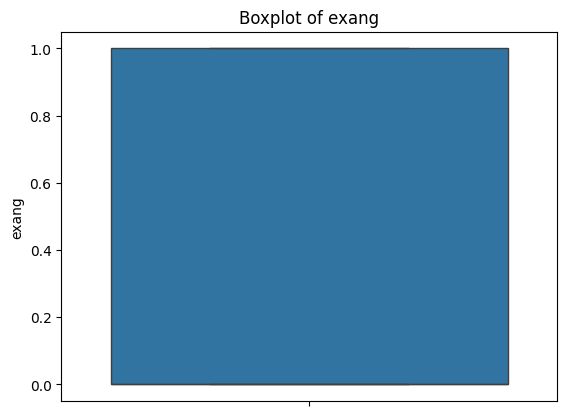

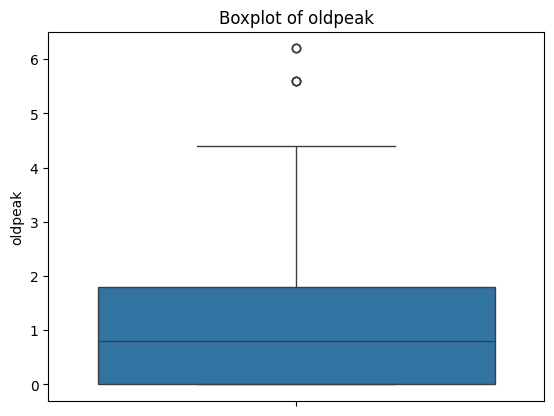

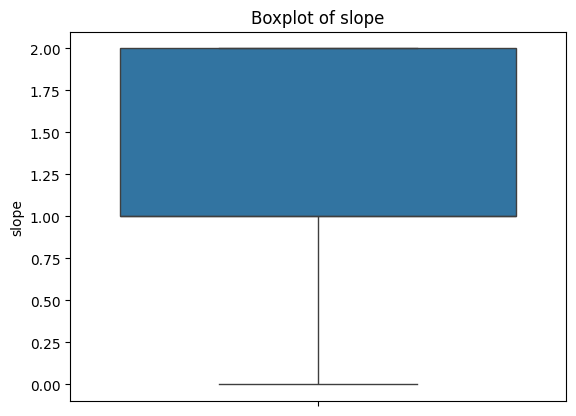

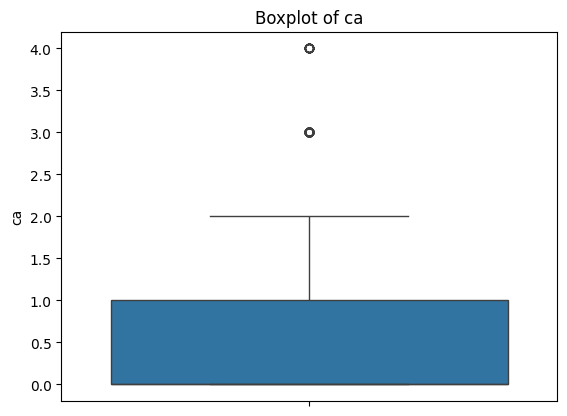

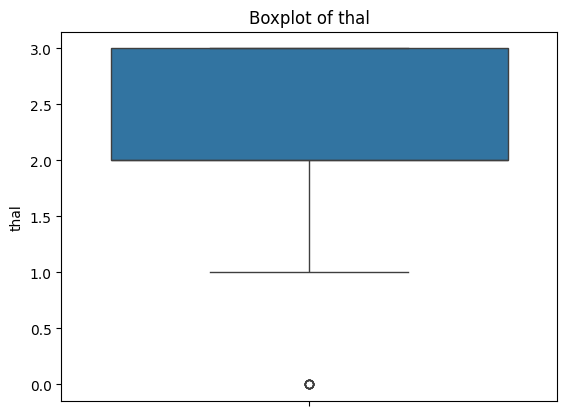

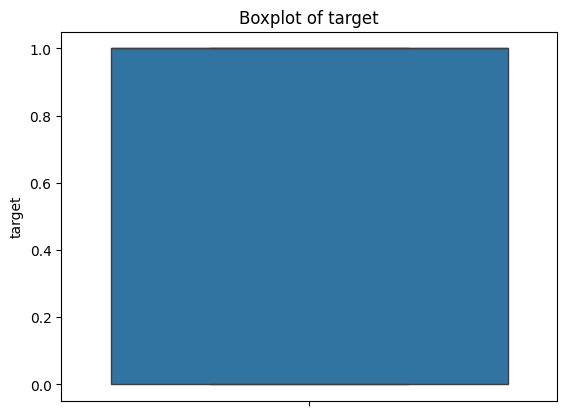

In [33]:
numeric_cols = df.select_dtypes(include='number').columns

# Histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##### For Categorical Columns

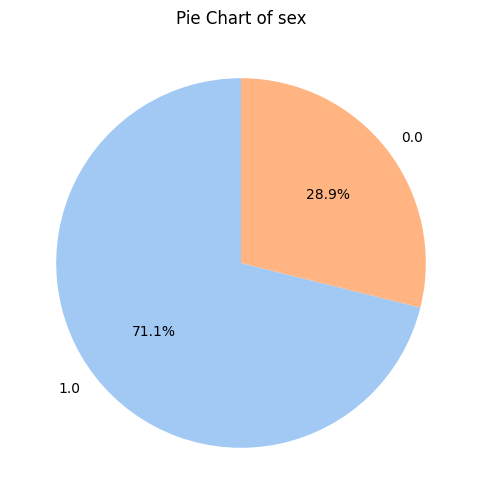

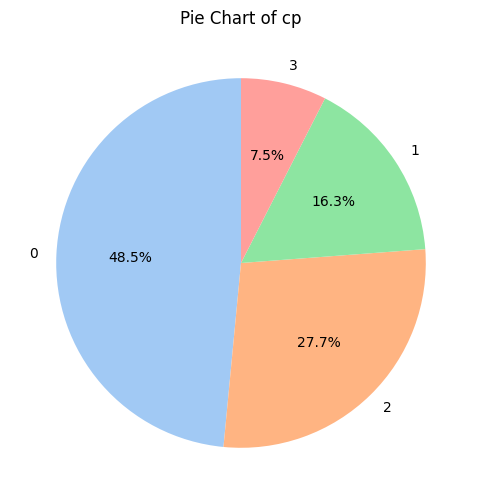

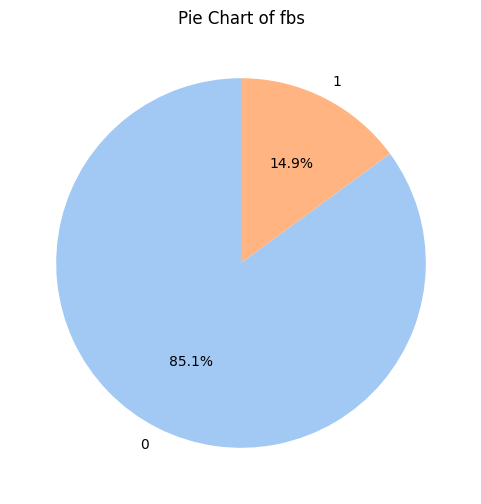

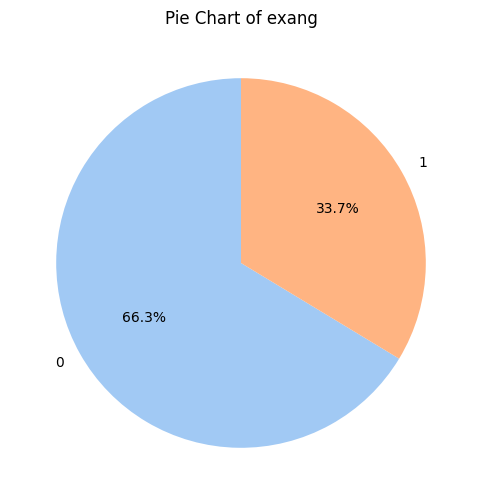

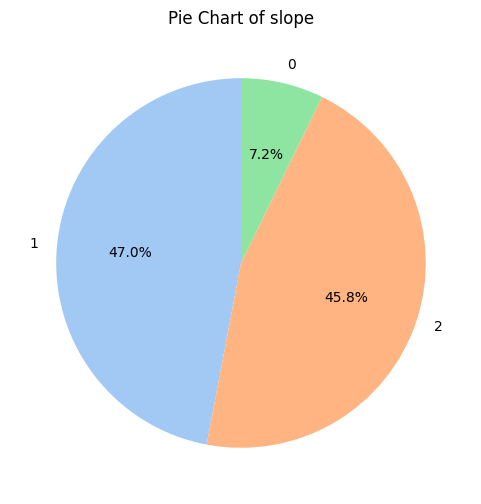

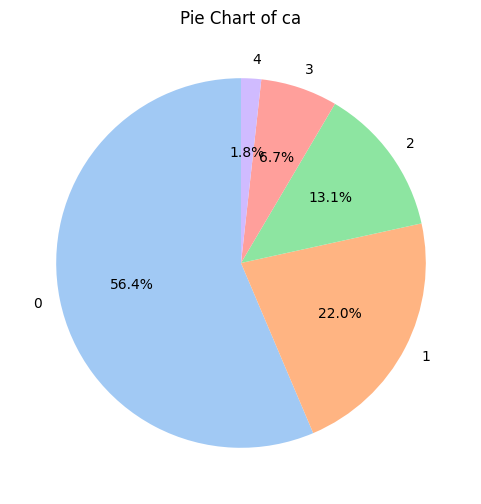

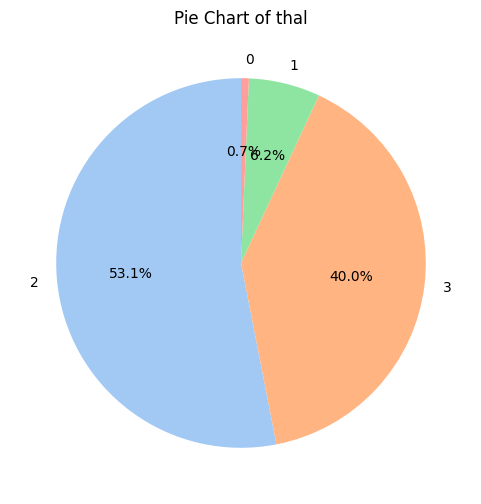

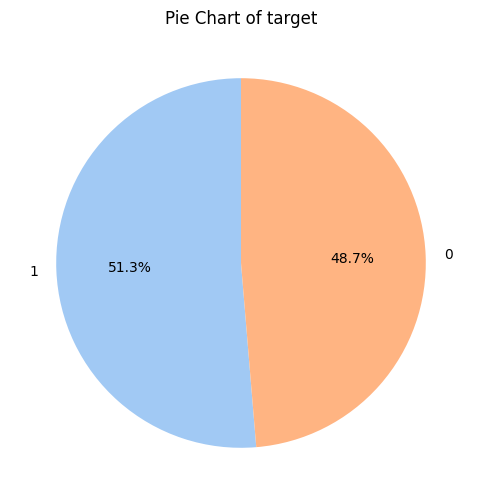

In [34]:
categorical_cols = ['sex', 'cp', 'fbs', 'exang', 'slope', 'ca', 'thal', 'target']

for col in categorical_cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')   
    plt.show()

## 3.4 BoxPlots after Oulier Removal

Q1 (25th percentile): 49.0
Q3 (75th percentile): 60.0
IQR: 11.0
Lower Limit: 32.5
Upper Limit: 76.5
Rows remaining after removing outliers: 1025


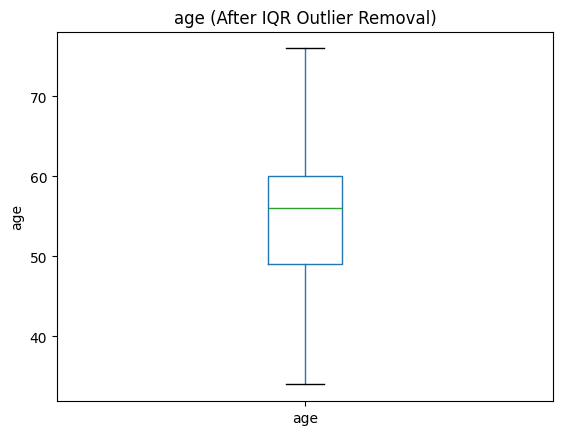

In [35]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

data = df[(df['age'] >= lower_limit) & (df['age'] <= upper_limit)]

print("Rows remaining after removing outliers:", df.shape[0])

data.boxplot(column='age', grid=False)
plt.title('age (After IQR Outlier Removal)')
plt.ylabel('age')
plt.show()

Q1 (25th percentile): 120.0
Q3 (75th percentile): 140.0
IQR: 20.0
Lower Limit: 90.0
Upper Limit: 170.0
Rows remaining after removing outliers: 1025


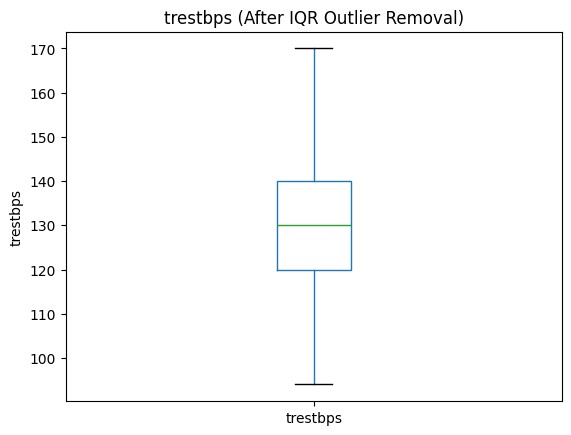

In [36]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)

IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

data = df[(df['trestbps'] >= lower_limit) & (df['trestbps'] <= upper_limit)]

print("Rows remaining after removing outliers:", df.shape[0])

data.boxplot(column='trestbps', grid=False)
plt.title('trestbps (After IQR Outlier Removal)')
plt.ylabel('trestbps')
plt.show()

Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR: 1.0
Lower Limit: -1.5
Upper Limit: 2.5
Rows remaining after removing outliers: 1025


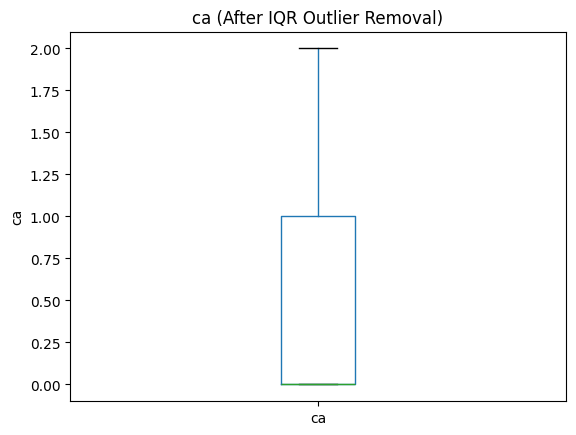

In [37]:
Q1 = df['ca'].quantile(0.25)
Q3 = df['ca'].quantile(0.75)

IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

data = df[(df['ca'] >= lower_limit) & (df['ca'] <= upper_limit)]

print("Rows remaining after removing outliers:", df.shape[0])

data.boxplot(column='ca', grid=False)
plt.title('ca (After IQR Outlier Removal)')
plt.ylabel('ca')
plt.show()

 ## 3.5 HeatMap 

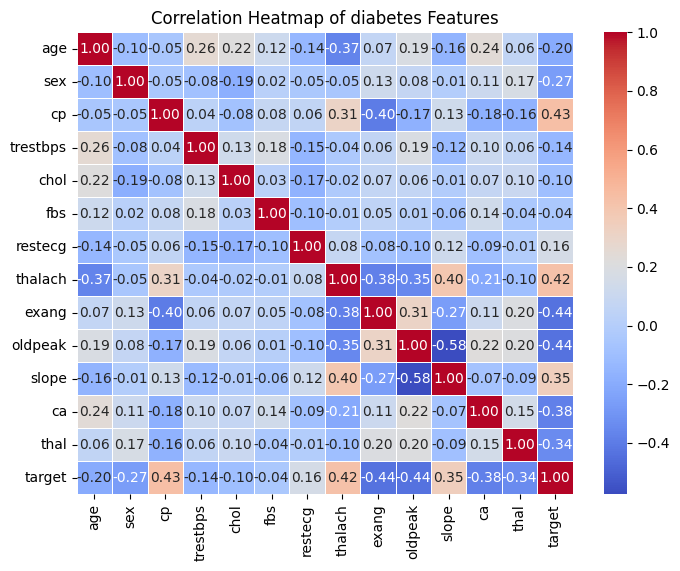

In [38]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of diabetes Features')
plt.show()

# 4.Select Features and Target Variable

Target column: if person has heart disease (1) , of NOT (0)

In [39]:
X = df.drop(columns='target', axis=1)
Y = df['target']
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# 5. Split the Dataset

splitting the data into training and testing sets while preserving class balance

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42)

# 6. Scaling the Dataset

In [41]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,62.0,0.0,0,138,294,1,1.0,106,0,1.9,1,3,2
688,56.0,0.0,0,200,288,1,0.0,133,1,4.0,0,2,3
477,57.0,1.0,2,128,229,0,0.0,150,0,0.4,1,1,3
336,57.0,1.0,2,150,126,1,1.0,173,0,0.2,2,1,3
960,52.0,0.0,2,136,196,0,0.0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,57.0,1.0,0,130,131,0,1.0,115,1,1.2,1,1,3
367,56.0,1.0,1,110,229,0,1.0,168,0,1.0,0,0,3
393,62.0,0.0,0,160,164,0,0.0,145,0,6.2,0,3,3
777,56.0,1.0,0,123,282,0,1.0,95,1,2.0,1,2,3


##### Standardize the numerical features using StandardScaler

In [43]:
# Initialize scaler
scaler = StandardScaler()
# Fit on training data only
X_train = scaler.fit_transform(X_train)
# Transform test data
X_test = scaler.transform(X_test)

In [44]:
X_train

array([[ 0.81586476, -1.55915437, -0.90957214, ..., -0.59754229,
         2.20730061, -0.56245085],
       [ 0.13098938, -1.55915437, -0.90957214, ..., -2.1987994 ,
         1.22840039,  1.0906305 ],
       [ 0.24513528,  0.64137331,  1.04803719, ..., -0.59754229,
         0.24950018,  1.0906305 ],
       ...,
       [ 0.81586476, -1.55915437, -0.90957214, ..., -2.1987994 ,
         2.20730061,  1.0906305 ],
       [ 0.13098938,  0.64137331, -0.90957214, ..., -0.59754229,
         1.22840039,  1.0906305 ],
       [ 0.70171887,  0.64137331,  1.04803719, ..., -0.59754229,
        -0.72940004, -0.56245085]], shape=(820, 13))

In [45]:
df.to_csv("processed_data.csv", index=False)